In [2]:
import numpy as np
import scipy.linalg
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
from general_graph_utils import *

# Create directed and undirected versions of the graphs

In [22]:
G_4state_2 = nx.DiGraph()
G_4state_2.add_nodes_from([1,2,3,4])
G_4state_2.add_edges_from([(1,2),(2,1),(2,3),(3,2),(4,1),(1,4),(3,4),(4,3),(4,2),(2,4)])

In [23]:
G_4state_2_ud = nx.Graph()
G_4state_2_ud.add_nodes_from([1,2,3,4])
G_4state_2_ud.add_edges_from([(1,2),(2,1),(2,3),(3,2),(4,1),(1,4),(3,4),(4,3),(4,2),(2,4)])

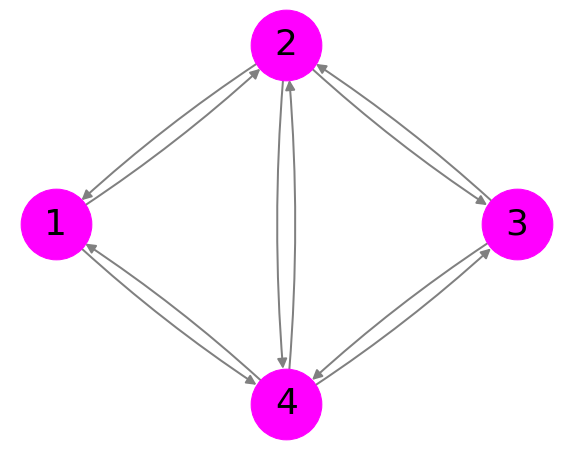

In [24]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-1, 3), 2:(0.5, 6), 3: (2, 3), 4:(0.5,0)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "magenta",
    "edge_color": "grey",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_4state_2, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_3state.png')

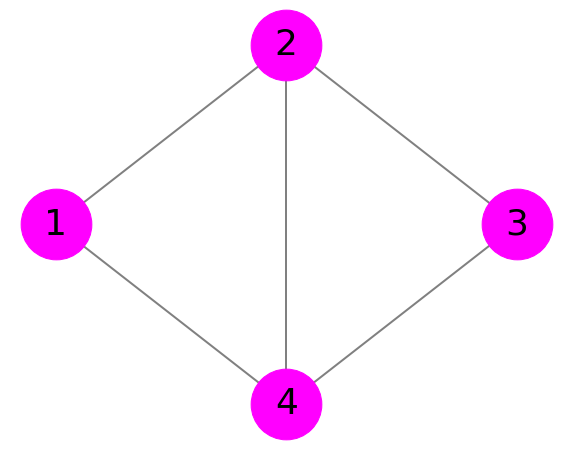

In [25]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-1, 3), 2:(0.5, 6), 3: (2, 3), 4:(0.5,0)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "magenta",
    "edge_color": "grey",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_4state_2_ud, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_3state_ud.png')

# Extract node, edge, weight, and cycle information from the graph

In [26]:
node_list_4state_2 = get_nodes(G_4state_2)

In [27]:
edge_list_4state_2 = get_edges(G_4state_2)

In [28]:
weight_dict_4state_2, weight_list_4state_2 = get_weights(G_4state_2, 10)

In [29]:
cycle_list_4state_2 = get_cycle_nodes(G_4state_2_ud)

In [30]:
num_cycles = len(cycle_list_4state_2)
num_nodes = len(node_list_4state_2)
num_edges = len(edge_list_4state_2)

In [31]:
print(node_list_4state_2)

[1 2 3 4]


In [32]:
print(edge_list_4state_2)

[[1 2]
 [1 4]
 [2 1]
 [2 3]
 [2 4]
 [3 2]
 [3 4]
 [4 1]
 [4 3]
 [4 2]]


In [33]:
print(weight_dict_4state_2)

{(1, 2): 4, (1, 4): 7, (2, 1): 2, (2, 3): 5, (2, 4): 6, (3, 2): 4, (3, 4): 6, (4, 1): 2, (4, 3): 6, (4, 2): 1}


In [34]:
print(weight_list_4state_2)

[4. 7. 2. 5. 6. 4. 6. 2. 6. 1.]


In [35]:
print(cycle_list_4state_2)

[[1, 2, 4], [2, 3, 4]]


# Obtain the corresponding edge and weight information for each cycle

In [254]:
cycle_edges_forward_3state, cycle_edges_backward_3state, cycle_weights_forward_3state, cycle_weights_backward_3state = get_cycle_weights_edges(G_3state_ud,cycle_list_3state,weight_dict_3state)

In [255]:
print(cycle_edges_forward_3state)

[[(1, 2), (2, 3), (3, 1)]]


In [256]:
print(cycle_edges_backward_3state)

[[(2, 1), (3, 2), (1, 3)]]


In [257]:
print(cycle_weights_forward_3state)

[[3, 6, 7]]


In [258]:
print(cycle_weights_backward_3state)

[[6, 8, 6]]


# Calculate the affinities for each cycle in the graph

In [259]:
affinities_f_3state, affinities_b_3state = calculate_cycle_products(cycle_weights_forward_3state,cycle_weights_backward_3state)

In [260]:
print(affinities_f_3state)

[126.]


In [261]:
print(affinities_b_3state)

[288.]


In [262]:
total_affinities_3state = calculate_affinities(affinities_f_3state, affinities_b_3state, cycle_list_3state)

In [263]:
print(total_affinities_3state)

[-0.82667857]


# Calculate the Laplacian matrix

In [264]:
L_3state = Laplacian_all(edge_list_3state,weight_list_3state,num_nodes,num_edges)

In [265]:
print(weight_dict_3state)

{(1, 2): 3, (1, 3): 6, (2, 1): 6, (2, 3): 6, (3, 2): 8, (3, 1): 7}


In [266]:
print(L_3state)

[[-13.   3.   6.]
 [  6. -11.   6.]
 [  7.   8. -12.]]


# Calculate higher-order autocorrelation functions

In [313]:
N = 10000
observable = [3, 5, 7]
tau_n = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)

In [314]:
t, t_rev = NG_III_autocorrelation_analytical(observable,L_3state,tau_n,alpha=1,beta=3)

In [315]:
area = np.abs(np.trapz(t)-np.trapz(t_rev))
print(area)

25.10945752216503


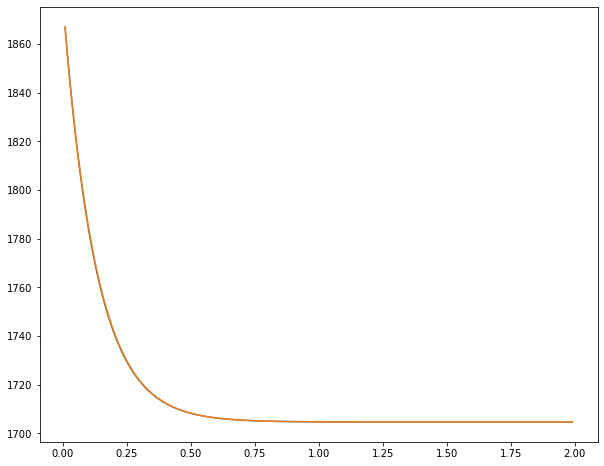

In [316]:
plt.plot(tau_n,t)
plt.plot(tau_n,t_rev)

# Calculate area distribution

In [317]:
forces = np.zeros((N,1))
areas = np.zeros((N,1))

In [318]:
for i in tqdm(range(0,N)):
    weight_dict_3state, weight_list_3state = get_weights(G_3state, 10)
    cycle_edges_forward_3state, cycle_edges_backward_3state, cycle_weights_forward_3state, cycle_weights_backward_3state = get_cycle_weights_edges(G_3state_ud,cycle_list_3state,weight_dict_3state)
    affinities_f_3state, affinities_b_3state = calculate_cycle_products(cycle_weights_forward_3state,cycle_weights_backward_3state)
    total_affinities_3state = calculate_affinities(affinities_f_3state, affinities_b_3state, cycle_list_3state)
    forces[i] = total_affinities_3state
    L_3state = Laplacian_all(edge_list_3state,weight_list_3state,num_nodes,num_edges)
    t, t_rev = NG_III_autocorrelation_analytical(observable,L_3state,tau_n,alpha=1,beta=3)
    areas[i] = np.abs(np.trapz(t)-np.trapz(t_rev))

100%|█████████████████████████████████████| 10000/10000 [05:28<00:00, 30.40it/s]


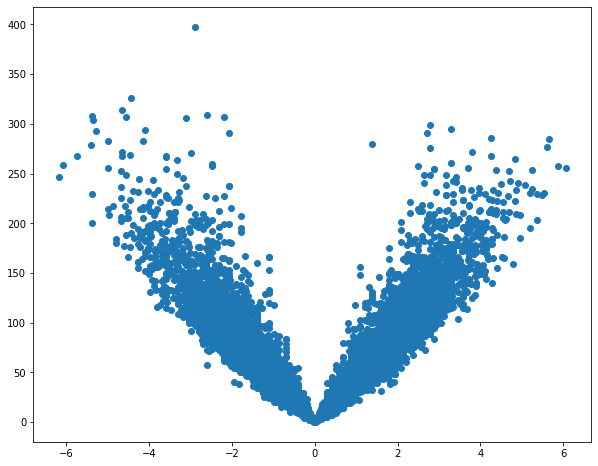

In [319]:
plt.scatter(forces,areas)

In [320]:
np.mean(areas)

62.748572274663076

In [321]:
np.mean(forces)

0.027904617651094515

In [311]:
np.random.choice(np.arange(1,100))

26